<p float="left">
  <img src='Active learning workflow.png', width="500px" height='200px' align="center" /> 
</p>

# Active discovery of donor acceptor combination for organic solar cells #

<b> nanoHUB tools by: <br>
</b>  <i>Prateek Malhotra</i>, <i>Prof. Subhayan Biswas</i>, and <i>Prof. G.D. Sharma</i>, Department of Physics, LNMIIT <br>
</b>  <i>Juan Carlos Verduzco Gastelum</i>, Purdue University <br>


## Overview
Reducing the time and cost associated with the discovery of new materials with unprecedented properties is expected to have significant societal impact. New materials are needed in the fields of energy, transportation, aerospace, and medicine, among others. This challenge will use machine learning tools to reduce the number of experiments to achieve a design goal. Active learning is a subset of machine learning where the information available at a given time is used to determine the next experiment to carry out in order to achieve a design goal. 

**Outline:**

1. Reading and parsing the collected dataset for PCE <br>
2. Obtaining features/descriptors through elemental properties and phase <br>
3. Processing and Organizing Data <br>
4. Regression Models with Random Forests (Citrination's Lolopy) <br>
5. Active Learning Approach <br>



# Import libraries

In [1]:
#Graphing software
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot


#Data manipulation libraries
import pandas as pd
import numpy as np

## 1. Reading the dataset along wirth their corresponding PCE. 


## 3. Processing and Organizing Data 



In [2]:
df=pd.read_csv('active discovery of da combination.csv')
df

,Unnamed: 0,Donor,Acceptor,Donor_can_smiles,Acceptor_can_smiles,PCE,D:A,Donor_MaxEStateIndex,Donor_MinEStateIndex,Donor_MaxAbsEStateIndex,...,Acceptor_fr_sulfide,Acceptor_fr_sulfonamd,Acceptor_fr_sulfone,Acceptor_fr_term_acetylene,Acceptor_fr_tetrazole,Acceptor_fr_thiazole,Acceptor_fr_thiocyan,Acceptor_fr_thiophene,Acceptor_fr_unbrch_alkane,Acceptor_fr_urea
0,0,D-0F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,11.60,D-0F:C8-ITIC,15.826616,0.070509,15.826616,...,0,0,0,0,0,0,0,4,16,0
1,1,D-2F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,12.20,D-2F:C8-ITIC,17.472290,-0.373608,17.472290,...,0,0,0,0,0,0,0,4,16,0
2,2,D-4F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,8.80,D-4F:C8-ITIC,18.497612,-0.645564,18.497612,...,0,0,0,0,0,0,0,4,16,0
3,3,D-0F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,8.00,D-0F:ITIC,15.826616,0.070509,15.826616,...,0,0,0,0,0,0,0,4,8,0
4,4,D-2F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,8.90,D-2F:ITIC,17.472290,-0.373608,17.472290,...,0,0,0,0,0,0,0,4,8,0
5,5,D-4F,ITIC,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,4.40,D-4F:ITIC,18.497612,-0.645564,18.497612,...,0,0,0,0,0,0,0,4,8,0
6,6,D-0F,IT-4F,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,7.80,D-0F:IT-4F,15.826616,0.070509,15.826616,...,0,0,0,0,0,0,0,4,8,0
7,7,D-2F,IT-4F,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,10.90,D-2F:IT-4F,17.472290,-0.373608,17.472290,...,0,0,0,0,0,0,0,4,8,0
8,8,D-4F,IT-4F,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,9.90,D-4F:IT-4F,18.497612,-0.645564,18.497612,...,0,0,0,0,0,0,0,4,8,0
9,9,PffBT4T-2DT,FBR,CCCCCCCCCCCCC(Cc1cc(sc1C)c1c(F)c(F)c(c2c1nsn2)...,CCCCCCCCCC1(CCCCCCCCC)c2cc(ccc2c2c1cc(cc2)c1cc...,7.80,PffBT4T-2DT:FBR,17.421622,-0.778406,17.421622,...,2,0,0,0,0,0,0,0,10,0


In [3]:
output = df['PCE']
b= df.drop(['PCE','Donor','Acceptor','Donor_can_smiles','Acceptor_can_smiles','D:A'],axis=1)
b=b.select_dtypes(include='number')  
print('Features with zero standard deviation :',len(b.std()[b.std() == 0])) #displaying features with zero std deviation
b=b.drop(b.std()[b.std() == 0].index.values, axis=1)  # Dropping features with zero std deviation
b = b.replace([np.inf, -np.inf], np.nan)
b = b.replace(np.nan,0)  #replace null values with zero
inputs=b
inputs.shape

Features with zero standard deviation : 130


(200, 287)

In [4]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(b, 0.8)
print('Features with correlation more than 0.8 :',len(set(corr_features)))
b=b.drop(corr_features,axis=1)   # Dropping features with correlation more than 0.8

Features with correlation more than 0.8 : 161


In [5]:
inputs=b
inputs.shape

(200, 126)

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
b_std = StandardScaler().fit_transform(b)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                              AutoMinorLocator)

No. of PC           Cumulative explained variance                                                   
--------------------------------------------------
1                   0.109931                                                                        
2                   0.197539                                                                        
3                   0.280769                                                                        
4                   0.355799                                                                        
5                   0.418546                                                                        
6                   0.472248                                                                        
7                   0.517136                                                                        
8                   0.554122                                                                        
9                   0.588196            

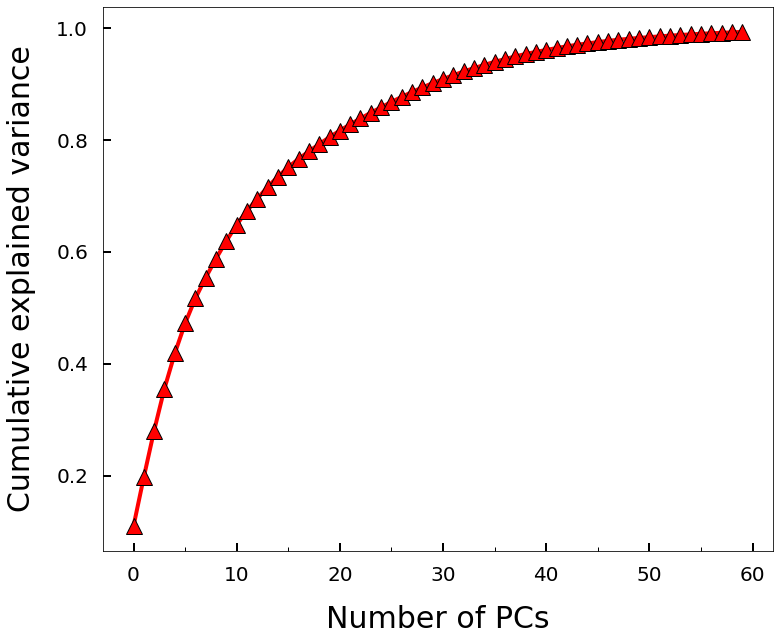

In [7]:
pca = PCA().fit(b_std)

#Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of PCs', fontsize=30,labelpad=20)
ax1.set_ylabel('Cumulative explained variance', fontsize=30,labelpad=20)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', which='major', direction='in', size=8, left='on', bottom='on', width=2, pad=15)
ax1.tick_params(axis='both', which='minor', direction='in', size=4, left='on', bottom='on',width=1, pad=15)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(axis="x", labelsize=20)

plt.gcf().set_size_inches((12, 10))
evr = np.cumsum(pca.explained_variance_ratio_)
evr =evr[:60]
ax1.plot(evr, marker='^',markersize=16, markeredgecolor='black', 
         linestyle='-',linewidth=4, color='red')   # Plotting

print('{:<20s}{:<80s}'.format('No. of PC','Cumulative explained variance'))
print(50*'-')
for i,a in enumerate(evr):
    if a<=1:
        print('{:<20d}{:<80f}'.format(i+1,a))

## 4. Regression Models with Random Forests (Citrination's Lolopy) (<br>

We will start by creating models for regression with all these entries and descriptors.



A random forest from the lolopy library is implemented and an equivalent match plot is shown below. This library can yield the sample-wise uncertainties from a model, following the work from Ling et al, and using a combination of the jackknife-after-bootstrap and infinitesimal-jackknife estimates paired with a montecarlo sampling correction. More details on this uncertainty estimates are discussed in the next section.

$$ \sigma^2_i(x) = Cov_j[n_{i,J}, T_J(x)]^2 + [\overline{T}_{-i}(x) - \overline{T}(x)]^2 - \frac{e\nu}{N_T} $$

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(inputs,output,test_size=0.1,random_state=1)

In [9]:
from lolopy.learners import RandomForestRegressor
model = RandomForestRegressor(num_trees=350)
model.fit(np.array(train_inputs), np.array(train_outputs))

y_pred, y_std = model.predict(test_inputs,return_std=True)
y_train = model.predict(train_inputs)

MAE_training = np.mean(abs(y_train - train_outputs))
MAE_testing = np.mean(abs(y_pred - test_outputs) )

In [10]:
MAE_testing 

1.6655042857142857

## Evaluate Model Performance

In [11]:
plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "PCE - MAE: %.3f HV" %MAE_testing, hovermode= 'closest',
                   font = dict(family='Times New Roman',size=28),
                   xaxis= dict(title= 'Reported PCE (%)',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= 'Predicted PCE (%)',zeroline= False, gridwidth= 2),#range=[-350,3750]),
                   height=600,
                   width=800,
     showlegend= True                 
)

fit  = np.linspace(min(df['PCE']), max(df['PCE']))
trace0 = go.Scatter(x = train_outputs, y = y_train, mode = 'markers', text=train_inputs.index, marker= dict(size= 12, color= 'blue'),name='Training Data')
trace1 = go.Scatter(x = test_outputs ,y = y_pred, mode = 'markers', text=test_inputs.index,marker= dict(size= 12, color= 'red'), 
                    error_y = dict(type='data',array=y_std,visible=True),name='Testing Data')
trace2 = go.Scatter(x = fit ,y = fit, mode = 'lines', marker= dict(size= 12, color= 'black'), text = 'Fit',name='Linear Fit')

data = [trace0,trace1,trace2]
fig= go.Figure(data, layout=layout0)
iplot(fig)

In [12]:
data = [trace1,trace2]
fig= go.Figure(data, layout=layout0)
iplot(fig)

## 5. Active Learning

Active learning is the use of algorithms not for regression, but for the improvement of the input sample space that guides the 'experiments' required to get to such maximum values. Even if it does make predictions for a specific material, its main task is the selection of the most likely candidate to be in a global maxima. Global optimization is based on the assumption that a model can perform better when it can "choose" which point to query next. This is the approach introduced in the paper by Julia Ling et al.


### 5.1 Uncertainty Estimates

The first step on active learning always comes from an approximation of the error in the prediction from the model. Relevant work on how to compute this estimates can be found in publications by [Efron](https://statistics.stanford.edu/sites/g/files/sbiybj6031/f/BIO%20262_0.pdf) and [Wager](https://jmlr.org/papers/volume15/wager14a/wager14a.pdf).

To compute an estimate, we need to understand how to compute some important quantities:

<b> Expected Value: </b> The mean of the predictions over all the decision trees represents the expected value for this particular model. The equation to compute this quantity is shown below:
<br>
<br>
$$ E[M(x)] = \frac{1}{N} \sum\limits_{J}^{n_T} T_J(x) $$
<br>

In this equation:

$E[M(x)] \rightarrow $ Expected value of the prediction of the model at point $x$
<br>
$ T_J(x) \rightarrow $ Prediction of tree index $J$ for point $x$
<br>
$n_T $ is the number of trees
<br>
<br>

<b> Variance: </b> For the calculation of the variance, we will compute the value of the <b>"Variance at point x due to training point i "</b>. For this model, we are following on the work from Ling et al, and using a combination of the jackknife-after-bootstrap and infinitesimal-jackknife estimates paired with a montecarlo sampling correction.

$$ \sigma^2_i(x) = Cov_j[n_{i,J}, T_J(x)]^2 + [\overline{T}_{-i}(x) - \overline{T}(x)]^2 - \frac{e\nu}{N_T} $$

In this equation:

$n_{i,J} \rightarrow $ Number of times point $i$ was used to train tree $J$
<br>
$\overline{T}_{-i}(x) \rightarrow $ Average of the prediction over the trees that were fit without using point $i$
<br>
$\overline{T}(x) \rightarrow $ Average of the prediction over all of the trees
<br>
$e$ is Euler's number and $\nu$ is the variance over all trees
<br>
<br>

<b> Uncertainty Estimate: </b> For the calculation of the estimate, we will add the contributions of each of the training points to the variance of our test point, together with an explicit bias model and a noise threshold.

$$ \sigma[M(x)] = \sqrt{ \sum\limits_{i=1}^S max[\sigma^2_i(x), \omega] + \widetilde{\sigma}^{ 2}(x)} $$

In this equation:

$\sigma^2_i(x) \rightarrow $ Variance at point x due to training point i
<br>
$\omega \rightarrow $ Noise threshold 
<br>
$ \widetilde{\sigma}^{ 2}(x) \rightarrow $ Explicit bias model
<br>
$S$ is the number of training points
<br>
<br>

The noise threshold ($\omega$) is defined as:
$$\omega = min_i \sigma^2 [M(x_i)]$$

### 5.2 Information Acquisition Functions

Information Acquisition Functions are based on different criteria on which point is more relevant for the model to query next. In this notebook we discuss MEI (Maximum Expected Improvement), MLI (Maximum Likelihood of Improvement), MU (Maximum Uncertainty) and UCB (Upper Confidence Bound).

<b>MM.</b> This approach takes the maximum value of the prediction of the model over the possible experiments to run.

<br>
$$ x^* = arg\_max \enspace E[M(x_i)]$$

where $x_i \rightarrow$ Set of possible experiments to run.

<br>

<b>MEI.<b>
 $$ MEI: x^*= argmax  \rho  ( E[M(x_i )] - E[M(x_{best})], \sigma [M(x_i)] ) $$
       $$ with \; \rho \; (z,s) = \begin{cases}
          s \phi'(\frac{z}{s}) +
          z \phi(\frac{z}{s}) & s > 0 \\
          max(z,0) & s = 0
          \end{cases} $$

<br>

<b>MLI.</b> This approach tells us that we are expecting to query a region for which we see an improvement and sufficient uncertainty to have a high likelihood of getting a larger value.

$$ x^* = arg\_max \enspace \frac{E[M(x_i)] - E[M(x_{best})]}{\sigma[M(x_i)]}$$

where $x_{best} \rightarrow$ Value of our current best case.

<br>

<b>MU.</b> This strategy queries the sample with the highest uncertainty.
<br>
$$ x^* = arg\_max \enspace \sigma[M(x_i)]$$
<br>

<b>UCB.</b> This strategy queries the sample with the maximum value of its mean prediction plus its uncertainty.
<br>
$$ x^* = arg\_max \enspace [E[M(x_i)] + \sigma[M(x_i)]]$$
<br>


In [13]:
mm_selection = np.argmax(y_pred)   

from scipy.stats import norm
def piecewise(m,s): # argument of the function, m is the prediction - top training point, s is the uncertainty of that point
    if s > 0:
        return s*norm.pdf(m/s)+m*norm.cdf(m/s)
    else:
        return max(np.max(m), 0) 
cons = np.max(train_outputs)
mei_selection = np.argmax([piecewise(mn-cons, sd) for mn,sd in zip(y_pred, y_std )])

mli_selection = np.argmax(np.divide(y_pred - np.max(train_outputs), y_std))
mu_selection = np.argmax(y_std)
ucb_selection = np.argmax([sum(x) for x in zip(y_pred, y_std)])

In [14]:
plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "PCE - MAE: %.3f HV" %MAE_testing, hovermode= 'closest',
                   font = dict(family='Times New Roman',size=18),
                   xaxis= dict(title= 'Real Values',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= 'Predictions',zeroline= False, gridwidth= 2),#range=[-350,3750]),
                   height=600,
                   width=1000,
     showlegend= True                 
)

fit  = np.linspace(min(df['PCE']), max(df['PCE']))
trace0 = go.Scatter(x = train_outputs, y = y_train, mode = 'markers', text=train_inputs.index, marker= dict(size= 12, color= 'blue'),name='Training Data')
trace1 = go.Scatter(x = test_outputs ,y = y_pred, mode = 'markers', text=test_inputs.index,marker= dict(size= 12, color= 'gray'), 
                    error_y = dict(type='data',array=y_std,visible=True),name='Testing Data')
trace2 = go.Scatter(x = fit ,y = fit, mode = 'lines', marker= dict(size= 12, color= 'black'), text = 'Fit',name='Linear Fit')

# data = [trace0,trace1,trace2]
# fig= go.Figure(data, layout=layout0)
# iplot(fig)

data1 = [trace1]
fig1= go.Figure(data1, layout=layout0)
iplot(fig1)

In [15]:
property_interest = 'PCE'
print('Predicted ' + property_interest + ' of material {} selected based on MM: {:.6f} +/- {:.6f}'.format(inputs.index[mm_selection], y_pred[mm_selection], y_std[mm_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on MEI: {:.6f} +/- {:.6f}'.format(inputs.index[mei_selection], y_pred[mei_selection], y_std[mei_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on MLI: {:.6f} +/- {:.6f}'.format(inputs.index[mli_selection], y_pred[mli_selection], y_std[mli_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on MU: {:.6f} +/- {:.6f}'.format(inputs.index[mu_selection], y_pred[mu_selection], y_std[mu_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on UCB: {:.6f} +/- {:.6f}'.format(inputs.index[ucb_selection], y_pred[ucb_selection], y_std[ucb_selection]))

Predicted PCE of material 0 selected based on MM: 15.090000 +/- 1.384801
Predicted PCE of material 15 selected based on MEI: 10.878543 +/- 4.789506
Predicted PCE of material 10 selected based on MLI: 14.749371 +/- 2.661067
Predicted PCE of material 15 selected based on MU: 10.878543 +/- 4.789506
Predicted PCE of material 10 selected based on UCB: 14.749371 +/- 2.661067


In [16]:
plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "PCE - MAE: %.3f HV" %MAE_testing, hovermode= 'closest',
                   font = dict(family='Times New Roman',size=18),
                   xaxis= dict(title= 'Real Values',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= 'Predictions',zeroline= False, gridwidth= 2),#range=[-350,3750]),
                   height=600,
                   width=1000,
     showlegend= True                 
)

fit  = np.linspace(min(df['PCE']), max(df['PCE']))
trace0 = go.Scatter(x = train_outputs, y = y_train, mode = 'markers', text=train_inputs.index, marker= dict(size= 12, color= 'blue'),name='Training Data')
trace1 = go.Scatter(x = test_outputs ,y = y_pred, mode = 'markers', text=test_inputs.index,marker= dict(size= 12, color= 'lightgray'), 
                    error_y = dict(type='data',array=y_std,visible=True),name='Testing Data')
trace2 = go.Scatter(x = fit ,y = fit, mode = 'lines', marker= dict(size= 12, color= 'black'), text = 'Fit',name='Linear Fit')

trace_mm = go.Scatter(x = [test_outputs[test_outputs.index[mm_selection]]] ,y = [y_pred[mm_selection]], mode = 'markers', text=test_inputs.index,marker= dict(symbol = 'triangle-up',size= 16, color= 'green',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mm_selection]],visible=True),name='Selected by MM')

trace_mei = go.Scatter(x = [test_outputs[test_outputs.index[mei_selection]]] ,y = [y_pred[mei_selection]], mode = 'markers', text=test_inputs.index,marker= dict(symbol = 'diamond',size= 16, color= 'blue',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mei_selection]],visible=True),name='Selected by MEI')

trace_mli = go.Scatter(x = [test_outputs[test_outputs.index[mli_selection]]] ,y = [y_pred[mli_selection]], mode = 'markers', text=test_inputs.index,marker= dict(symbol = 'star',size= 16, color= 'red',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mli_selection]],visible=True,width=13),name='Selected by MLI')

trace_mu = go.Scatter(x = [test_outputs[test_outputs.index[mu_selection]]] ,y = [y_pred[mu_selection]], mode = 'markers', text=test_inputs.index,marker= dict(symbol = 'square',size= 25, color= 'purple',opacity=0.5), 
                    error_y = dict(type='data',array=[y_std[mu_selection]],visible=True,width=13),name='Selected by MU')

trace_ucb = go.Scatter(x = [test_outputs[test_outputs.index[ucb_selection]]] ,y = [y_pred[ucb_selection]], mode = 'markers', text=test_inputs.index,marker= dict(symbol = 'circle',size= 25, color= 'darkorange',opacity=0.5), 
                    error_y = dict(type='data',array=[y_std[ucb_selection]],visible=True),name='Selected by UCB')

# data = [trace0,trace1,trace2]
# fig= go.Figure(data, layout=layout0)
# iplot(fig)

data1 = [trace1, trace_mm, trace_mei, trace_mli ,trace_mu, trace_ucb ]
fig1= go.Figure(data1, layout=layout0)
iplot(fig1)

In [17]:
plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "PCE - MAE: %.3f HV" %MAE_testing, hovermode= 'closest',
                   font = dict(family='Times New Roman',size=18),
                   xaxis= dict(title= 'Real Values',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= 'Predictions',zeroline= False, gridwidth= 2),#range=[-350,3750]),
                   height=600,
                   width=1000,
     showlegend= True                 
)

fit  = np.linspace(min(df['PCE']), max(df['PCE']))
trace0 = go.Scatter(x = train_outputs, y = y_train, mode = 'markers', text=train_inputs.index, marker= dict(size= 12, color= 'blue'),name='Training Data')
trace1 = go.Scatter(x = test_outputs ,y = y_pred, mode = 'markers', text=test_inputs.index,marker= dict(size= 12, color= 'lightgray'), 
                    error_y = dict(type='data',array=y_std,visible=True),name='Testing Data')
trace2 = go.Scatter(x = fit ,y = fit, mode = 'lines', marker= dict(size= 12, color= 'black'), text = 'Fit',name='Linear Fit')

trace_mm = go.Scatter(x = [test_outputs[test_outputs.index[mm_selection]]] ,y = [y_pred[mm_selection]], mode = 'markers+text', text=df.iloc[mm_selection]['D:A'],textposition='bottom left',textfont=dict(color='#008000'),marker= dict(symbol = 'triangle-up',size= 16, color= 'green',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mm_selection]],visible=True),name='Selected by MM')

trace_mei = go.Scatter(x = [test_outputs[test_outputs.index[mei_selection]]] ,y = [y_pred[mei_selection]], mode = 'markers+text', text=df.iloc[mei_selection]['D:A'],textposition='top right',textfont=dict(color='#0000ff'),marker= dict(symbol = 'diamond',size= 16, color= 'blue',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mei_selection]],visible=True),name='Selected by MEI')

trace_mli = go.Scatter(x = [test_outputs[test_outputs.index[mli_selection]]] ,y = [y_pred[mli_selection]], mode = 'markers+text', text=df.iloc[mli_selection]['D:A'],textposition='top left',textfont=dict(color='#ff0000'),marker= dict(symbol = 'star',size= 16, color= 'red',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mli_selection]],visible=True,width=13),name='Selected by MLI')

trace_mu = go.Scatter(x = [test_outputs[test_outputs.index[mu_selection]]] ,y = [y_pred[mu_selection]], mode = 'markers+text', text=df.iloc[mu_selection]['D:A'],textposition='bottom right',textfont=dict(color='#800080'),marker= dict(symbol = 'square',size= 25, color= 'purple',opacity=0.5), 
                    error_y = dict(type='data',array=[y_std[mu_selection]],visible=True,width=13),name='Selected by MU')

trace_ucb = go.Scatter(x = [test_outputs[test_outputs.index[ucb_selection]]] ,y = [y_pred[ucb_selection]], mode = 'markers+text', text=df.iloc[ucb_selection]['D:A'],textposition='bottom left',textfont=dict(color='#ff8c00'),marker= dict(symbol = 'circle',size= 25, color= 'darkorange',opacity=0.5), 
                    error_y = dict(type='data',array=[y_std[ucb_selection]],visible=True),name='Selected by UCB')

# data = [trace0,trace1,trace2]
# fig= go.Figure(data, layout=layout0)
# iplot(fig)

data1 = [trace1, trace_mm, trace_mei, trace_mli ,trace_mu, trace_ucb ]
fig1= go.Figure(data1, layout=layout0)
iplot(fig1)

Here index value corresponds to index of y_pred

---
### 5.3 Approach

We will select an initial set of 10% of the entries, and we'll make sure the highest value is not in it. If it is, the cell will throw an error, just re-run it so that it can shuffle it again. 
## Objective: using 10 different initial sets of data containint 10% of the initial entries, create distributions of each acquisition function and its time to find the maximum value.

In [18]:
all_values = [list(inputs.iloc[x]) for x in range(len(inputs.index))]
all_values = np.array(all_values, dtype = float) 

all_labels = output.copy()

count    200.000000
mean       9.890750
std        3.086631
min        4.100000
25%        7.790000
50%        9.600000
75%       11.805000
max       18.320000
Name: PCE, dtype: float64


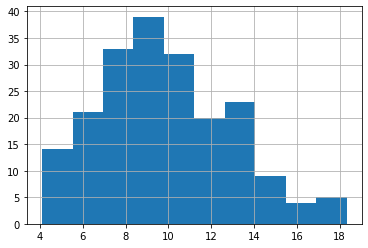

In [19]:
print(df.PCE.describe())
df.PCE.hist()
import plotly.express as px
fig = px.histogram(df, x="PCE")
fig.update_layout(width = 650, height = 420,font = dict(family='Times New Roman',size=22),yaxis= dict(title= 'Count',zeroline= False, gridwidth= 2),xaxis= dict(title= 'PCE(%)',zeroline= False, gridwidth= 2))
fig.show()

In [20]:
import plotly.figure_factory as ff

hist_data = [df['PCE']]
group_labels = ['PCE(%)'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels,show_rug=False)
fig.update_layout(width = 650, height = 420,font = dict(family='Times New Roman',size=22),)
fig.show()

In [21]:
# indexNames = df[ df['PCE'] <= 10 ].index    # To select the data with PCE < 10%
# indexNames=np.array(indexNames)
# print(indexNames)
# len(indexNames)

In [22]:
dropped_data = df[['PCE','Donor','Acceptor','Donor_can_smiles','Acceptor_can_smiles','D:A']]
al_dataset =pd.concat([dropped_data,inputs], axis =1)
al_dataset

,PCE,Donor,Acceptor,Donor_can_smiles,Acceptor_can_smiles,D:A,Unnamed: 0,Donor_MaxEStateIndex,Donor_MinEStateIndex,Donor_MinAbsEStateIndex,...,Acceptor_NHOHCount,Acceptor_NumAliphaticCarbocycles,Acceptor_NumAliphaticRings,Acceptor_NumAromaticHeterocycles,Acceptor_NumSaturatedHeterocycles,Acceptor_fr_alkyl_halide,Acceptor_fr_allylic_oxid,Acceptor_fr_aniline,Acceptor_fr_bicyclic,Acceptor_fr_unbrch_alkane
0,11.60,D-0F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,D-0F:C8-ITIC,0,15.826616,0.070509,0.070509,...,0,4,4,4,0,0,6,0,12,16
1,12.20,D-2F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,D-2F:C8-ITIC,1,17.472290,-0.373608,0.140776,...,0,4,4,4,0,0,6,0,12,16
2,8.80,D-4F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,D-4F:C8-ITIC,2,18.497612,-0.645564,0.079293,...,0,4,4,4,0,0,6,0,12,16
3,8.00,D-0F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-0F:ITIC,3,15.826616,0.070509,0.070509,...,0,4,4,4,0,0,6,0,12,8
4,8.90,D-2F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-2F:ITIC,4,17.472290,-0.373608,0.140776,...,0,4,4,4,0,0,6,0,12,8
5,4.40,D-4F,ITIC,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-4F:ITIC,5,18.497612,-0.645564,0.079293,...,0,4,4,4,0,0,6,0,12,8
6,7.80,D-0F,IT-4F,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-0F:IT-4F,6,15.826616,0.070509,0.070509,...,0,4,4,4,0,0,6,0,12,8
7,10.90,D-2F,IT-4F,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-2F:IT-4F,7,17.472290,-0.373608,0.140776,...,0,4,4,4,0,0,6,0,12,8
8,9.90,D-4F,IT-4F,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-4F:IT-4F,8,18.497612,-0.645564,0.079293,...,0,4,4,4,0,0,6,0,12,8
9,7.80,PffBT4T-2DT,FBR,CCCCCCCCCCCCC(Cc1cc(sc1C)c1c(F)c(F)c(c2c1nsn2)...,CCCCCCCCCC1(CCCCCCCCC)c2cc(ccc2c2c1cc(cc2)c1cc...,PffBT4T-2DT:FBR,9,17.421622,-0.778406,0.293011,...,0,1,3,2,2,0,0,0,5,10


In [23]:
filtered_set = al_dataset[al_dataset['PCE']>=10]          # to select data in which none of the donor or acceptor is involved in getting PCE of greater than 10%
unique_d =filtered_set["Donor_can_smiles"].unique()   
unique_a =filtered_set["Acceptor_can_smiles"].unique()  
initial_set=df[~df['Donor_can_smiles'].isin(unique_d)]
initial_set=initial_set[~initial_set['Acceptor_can_smiles'].isin(unique_a)]

indexNames=initial_set.index
indexNames=np.array(indexNames)
print(indexNames)
len(indexNames)

[  9  10  13  17  90 147 148 149 150 151 163 164 189 190 191]


15

In [24]:
X = all_values.copy()
y = all_labels.copy()

np.random.seed(seed=1)
entry_number_init = int(0.05*len(all_values))

in_train = np.zeros(len(inputs), dtype=np.bool)               
in_train[np.random.choice(indexNames, entry_number_init, replace=False)] = True       # indexNames represent the index values where PCE is less than 10%
print('Picked {} training entries'.format(in_train.sum()))
assert not np.isclose(max(y), max(y[in_train]))

Picked 10 training entries


We will then train the model with this initial set and make predictions:

Then, we will query the next material to sample using the four different acquisition functions we described before.

Just as a reminder, the NumPy function <b>argmax</b> returns the index of the maximum value of an array.

# dataset with PCE less 10%

In [25]:
initial_set[['Donor','Acceptor','PCE']]

,Donor,Acceptor,PCE
9,PffBT4T-2DT,FBR,7.80
10,PffBT4T-2DT,IDTBR,9.95
13,P3TEA,SF-PDI2,9.50
17,BDT-ffBX-DT,SFPDI,6.20
90,PMOT39,i-IEICO-2F,6.00
147,PTPDBDT,H-ITIC,5.60
148,PTPDBDT,F-ITIC,8.80
149,PTPDBDT,Cl-ITIC,9.50
150,PTPDBDT,Br-ITIC,9.40
151,PTPDBDT,I-ITIC,8.90


# 10 data selected for initial training set

In [26]:
df[in_train][['Donor','Acceptor','PCE']]

,Donor,Acceptor,PCE
9,PffBT4T-2DT,FBR,7.80
10,PffBT4T-2DT,IDTBR,9.95
13,P3TEA,SF-PDI2,9.50
17,BDT-ffBX-DT,SFPDI,6.20
90,PMOT39,i-IEICO-2F,6.00
148,PTPDBDT,F-ITIC,8.80
149,PTPDBDT,Cl-ITIC,9.50
163,PffBT-T3,TPPz-PDI4,6.90
190,PDBT-T1,IDIC,9.20
191,PTFBDT-BZS,IDIC,8.06


In [27]:
PCE_train_max = df[in_train]['PCE'].max()

In [28]:
model.fit(X[in_train],y[in_train])                                      # Fitting the model on randomly selected small dataset and prediction on remaining dataset
y_pred,y_std = model.predict(X[~in_train], return_std=True)

In [29]:
mm_selection = np.argmax(y_pred)    

from scipy.stats import norm
def piecewise(m,s): # argument of the function, m is the prediction - top training point, s is the uncertainty of that point
    if s > 0:
        return s*norm.pdf(m/s)+m*norm.cdf(m/s)
    else:
        return max(np.max(m), 0) 
cons = np.max(y[in_train])
mei_selection = np.argmax([piecewise(mn-cons, sd) for mn,sd in zip(y_pred, y_std )])

mli_selection = np.argmax(np.divide(y_pred - np.max(y[in_train]), y_std))
mu_selection = np.argmax(y_std)
ucb_selection = np.argmax([sum(x) for x in zip(y_pred, y_std)])

In [30]:
print('Predicted ' + property_interest + ' of material {} selected based on MM: {:.6f} +/- {:.6f}'.format(inputs.index[mm_selection], y_pred[mm_selection], y_std[mm_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on MEI: {:.6f} +/- {:.6f}'.format(inputs.index[mei_selection], y_pred[mei_selection], y_std[mei_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on MLI: {:.6f} +/- {:.6f}'.format(inputs.index[mli_selection], y_pred[mli_selection], y_std[mli_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on MU: {:.6f} +/- {:.6f}'.format(inputs.index[mu_selection], y_pred[mu_selection], y_std[mu_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on UCB: {:.6f} +/- {:.6f}'.format(inputs.index[ucb_selection], y_pred[ucb_selection], y_std[ucb_selection]))

Predicted PCE of material 143 selected based on MM: 9.088314 +/- 0.912916
Predicted PCE of material 50 selected based on MEI: 9.062229 +/- 1.301854
Predicted PCE of material 50 selected based on MLI: 9.062229 +/- 1.301854
Predicted PCE of material 87 selected based on MU: 7.512114 +/- 1.587380
Predicted PCE of material 50 selected based on UCB: 9.062229 +/- 1.301854


In [32]:
print('Predicted ' + property_interest + ' of material {} selected based on MM: {:.6f} +/- {:.6f}'.format(df[~in_train].iloc[mm_selection]['D:A'], y_pred[mm_selection], y_std[mm_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on MEI: {:.6f} +/- {:.6f}'.format(df[~in_train].iloc[mei_selection]['D:A'], y_pred[mei_selection], y_std[mei_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on MLI: {:.6f} +/- {:.6f}'.format(df[~in_train].iloc[mli_selection]['D:A'], y_pred[mli_selection], y_std[mli_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on MU: {:.6f} +/- {:.6f}'.format(df[~in_train].iloc[mu_selection]['D:A'], y_pred[mu_selection], y_std[mu_selection]))
print('Predicted ' + property_interest + ' of material {} selected based on UCB: {:.6f} +/- {:.6f}'.format(df[~in_train].iloc[ucb_selection]['D:A'], y_pred[ucb_selection], y_std[ucb_selection]))

Predicted PCE of material PTPDBDT:Br-ITIC selected based on MM: 9.088314 +/- 0.912916
Predicted PCE of material PffBT2T-TT:O-IDTBR selected based on MEI: 9.062229 +/- 1.301854
Predicted PCE of material PffBT2T-TT:O-IDTBR selected based on MLI: 9.062229 +/- 1.301854
Predicted PCE of material PTH37:i-IEICO selected based on MU: 7.512114 +/- 1.587380
Predicted PCE of material PffBT2T-TT:O-IDTBR selected based on UCB: 9.062229 +/- 1.301854


In [33]:
plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "PCE - MAE: %.3f HV" %MAE_testing, hovermode= 'closest',
                   font = dict(family='Times New Roman',size=22),
                   xaxis= dict(title= 'Reported PCE (%)',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= 'Predicted PCE (%)',zeroline= False, gridwidth= 2),#range=[-350,3750]),
                   height=600,
                   width=800,
     showlegend= True                 
)

# fit  = np.linspace(min(df['PCE']), max(df['PCE']))
# trace0 = go.Scatter(x = train_outputs, y = y_train, mode = 'markers', text=train_inputs.index, marker= dict(size= 12, color= 'blue'),name='Training Data')
trace1 = go.Scatter(x = y[~in_train] ,y = y_pred, mode = 'markers', text=test_inputs.index,marker= dict(size= 12, color= 'lightgray'), 
                    error_y = dict(type='data',array=y_std,visible=True),name='Testing Data')
# trace2 = go.Scatter(x = fit ,y = fit, mode = 'lines', marker= dict(size= 12, color= 'black'), text = 'Fit',name='Linear Fit')

trace_mm = go.Scatter(x = [y[~in_train][y[~in_train].index[mm_selection]]] ,y = [y_pred[mm_selection]], mode = 'markers+text',textfont=dict(color='#008000'),marker= dict(symbol = 'triangle-up',size= 28, color= 'green',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mm_selection]],visible=True),name='Selected by MM')

trace_mei = go.Scatter(x = [y[~in_train][y[~in_train].index[mei_selection]]] ,y = [y_pred[mei_selection]], mode = 'markers+text',textfont=dict(color='#0000ff'),marker= dict(symbol = 'diamond',size= 25, color= 'blue',opacity=1), 
                    error_y = dict(type='data',array=[y_std[mei_selection]],visible=True),name='Selected by MEI')

trace_mli = go.Scatter(x = [y[~in_train][y[~in_train].index[mli_selection]]] ,y = [y_pred[mli_selection]], mode = 'markers+text',textfont=dict(color='#ff0000'),marker= dict(symbol = 'star',size= 25, color= 'red',opacity=1), 
                    error_y = dict(type='data',array=[y_std[mli_selection]],visible=True),name='Selected by MLI')

trace_mu = go.Scatter(x = [y[~in_train][y[~in_train].index[mu_selection]]] ,y = [y_pred[mu_selection]], mode = 'markers+text',textfont=dict(color='#800080'),marker= dict(symbol = 'square',size= 20, color= 'purple',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mu_selection]],visible=True),name='Selected by MU')

trace_ucb = go.Scatter(x = [y[~in_train][y[~in_train].index[ucb_selection]]] ,y = [y_pred[ucb_selection]], mode = 'markers+text',textfont=dict(color='#ff8c00'),marker= dict(symbol = 'circle',size= 12, color= 'darkorange',opacity=1), 
                    error_y = dict(type='data',array=[y_std[ucb_selection]],visible=True),name='Selected by UCB')

x_line=[3,20]
y_line=[PCE_train_max,PCE_train_max]
line=go.Scatter(x=x_line, y=y_line,mode='lines',name='Max PCE in training set',line = dict(color='black', width=3, dash='dash'))

data1 = [trace1, trace_mm, trace_mei, trace_mli ,trace_mu, trace_ucb, line]
fig1= go.Figure(data1, layout=layout0)
iplot(fig1)

In [36]:
plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "PCE - MAE: %.3f HV" %MAE_testing, hovermode= 'closest',
                   font = dict(family='Times New Roman',size=22),
                   xaxis= dict(title= 'Reported PCE (%)',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= 'Predicted PCE (%)',zeroline= False, gridwidth= 2),#range=[-350,3750]),
                   height=600,
                   width=900,
     showlegend= True                 
)

# fit  = np.linspace(min(df['PCE']), max(df['PCE']))
# trace0 = go.Scatter(x = train_outputs, y = y_train, mode = 'markers', text=train_inputs.index, marker= dict(size= 12, color= 'blue'),name='Training Data')
trace1 = go.Scatter(x = y[~in_train] ,y = y_pred, mode = 'markers', text=test_inputs.index,marker= dict(size= 12, color= 'lightgray'), 
                    error_y = dict(type='data',array=y_std,visible=True),name='Testing Data')
# trace2 = go.Scatter(x = fit ,y = fit, mode = 'lines', marker= dict(size= 12, color= 'black'), text = 'Fit',name='Linear Fit')

trace_mm = go.Scatter(x = [y[~in_train][y[~in_train].index[mm_selection]]] ,y = [y_pred[mm_selection]], mode = 'markers+text', text=df[~in_train].iloc[mm_selection]['D:A'],textposition='top left',textfont=dict(color='#008000'),marker= dict(symbol = 'triangle-up',size= 28, color= 'green',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mm_selection]],visible=True),name='Selected by MM')

trace_mei = go.Scatter(x = [y[~in_train][y[~in_train].index[mei_selection]]] ,y = [y_pred[mei_selection]], mode = 'markers+text', text=df[~in_train].iloc[mei_selection]['D:A'],textposition='top right',textfont=dict(color='#0000ff'),marker= dict(symbol = 'diamond',size= 25, color= 'blue',opacity=1), 
                    error_y = dict(type='data',array=[y_std[mei_selection]],visible=True),name='Selected by MEI')

trace_mli = go.Scatter(x = [y[~in_train][y[~in_train].index[mli_selection]]] ,y = [y_pred[mli_selection]], mode = 'markers+text', text=df[~in_train].iloc[mli_selection]['D:A'],textposition='middle right',textfont=dict(color='#ff0000'),marker= dict(symbol = 'star',size= 25, color= 'red',opacity=1), 
                    error_y = dict(type='data',array=[y_std[mli_selection]],visible=True),name='Selected by MLI')

trace_mu = go.Scatter(x = [y[~in_train][y[~in_train].index[mu_selection]]] ,y = [y_pred[mu_selection]], mode = 'markers+text', text=df[~in_train].iloc[mu_selection]['D:A'],textposition='bottom right',textfont=dict(color='#800080'),marker= dict(symbol = 'square',size= 20, color= 'purple',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[mu_selection]],visible=True),name='Selected by MU')

trace_ucb = go.Scatter(x = [y[~in_train][y[~in_train].index[ucb_selection]]] ,y = [y_pred[ucb_selection]], mode = 'markers+text', text=df[~in_train].iloc[ucb_selection]['D:A'],textposition='bottom right',textfont=dict(color='#ff8c00'),marker= dict(symbol = 'circle',size= 12, color= 'darkorange',opacity=1), 
                    error_y = dict(type='data',array=[y_std[ucb_selection]],visible=True),name='Selected by UCB')

x_line=[3,20]
y_line=[PCE_train_max,PCE_train_max]
line=go.Scatter(x=x_line, y=y_line,mode='lines',name='Max PCE in training set',line = dict(color='black', width=3, dash='dash'))

data1 = [trace1, trace_mm, trace_mei, trace_mli ,trace_mu, trace_ucb, line]
fig1= go.Figure(data1, layout=layout0)
iplot(fig1)

This is the algorithm that runs the queries. We start with the initial set and we run 50 experiments to test how long would it take for us to get to the sample with the highest value. Each of the approaches selects a different next point to query and include in the training set.

In [ ]:
n_steps =60
all_inds = set(range(len(y)))

random_train = [list(set(np.where(in_train)[0].tolist()))]
mm_train = [list(set(np.where(in_train)[0].tolist()))]
mei_train = [list(set(np.where(in_train)[0].tolist()))]
mli_train = [list(set(np.where(in_train)[0].tolist()))]
mu_train = [list(set(np.where(in_train)[0].tolist()))]
ucb_train = [list(set(np.where(in_train)[0].tolist()))]
random_train_inds = []
mm_train_inds = []
mei_train_inds = []
mli_train_inds = []
ucb_train_inds = []


for i in range(n_steps):
    print(i)
    
    # Maximum Mean
    
    mm_train_inds = mm_train[-1].copy()    # Initial Set (In the first run) / Current Set (From last iteration, after the first run)
    mm_search_inds = list(all_inds.difference(mm_train_inds)) # All samples not in the current set
    
    
    model.fit(X[mm_train_inds], y[mm_train_inds]) # Training of the random forest model
    mm_y_pred = model.predict(X[mm_search_inds]) # Predictions for the unknown materials

    mm_train_inds.append(mm_search_inds[np.argmax(mm_y_pred)]) # Information Acquisition Function choice and addition to current set
    mm_train.append(mm_train_inds) # Storage of the current set per step    
    
    # Maximum Expected Improvement
    
    mei_train_inds = mei_train[-1].copy()    # Initial Set (In the first run) / Current Set (From last iteration, after the first run)
    mei_search_inds = list(all_inds.difference(mei_train_inds)) # All samples not in the current set
    
    
    model.fit(X[mei_train_inds], y[mei_train_inds]) # Training of the random forest model
    mei_y_pred, mei_y_std = model.predict(X[mei_search_inds], return_std=True) # Predictions for the unknown materials

    
    def piecewise(m,s): # argument of the function, m is the prediction - top training point, s is the uncertainty of that point
        if s > 0:
            return s*norm.pdf(m/s)+m*norm.cdf(m/s)
        else:
            return max(np.max(m), 0) 
    cons = np.max(y[mei_train_inds])
    mei_train_inds.append(mei_search_inds[np.argmax([piecewise(mn-cons, sd) for mn,sd in zip(mei_y_pred, mei_y_std )])]) # Information Acquisition Function choice and addition to current set
    mei_train.append(mei_train_inds) # Storage of the current set per step    

    # Maximum Likelihood of Improvement
    
    mli_train_inds = mli_train[-1].copy()  
    mli_search_inds = list(all_inds.difference(mli_train_inds))
    
    model.fit(X[mli_train_inds], y[mli_train_inds])
    mli_y_pred, mli_y_std = model.predict(X[mli_search_inds], return_std=True)
    
    mli_train_inds.append(mli_search_inds[np.argmax(np.divide(mli_y_pred - np.max(y[mli_train_inds]), mli_y_std))])
    mli_train.append(mli_train_inds)
    
    # Maximum Uncertainty
    
    mu_train_inds = mu_train[-1].copy()  
    mu_search_inds = list(all_inds.difference(mu_train_inds))
    
    model.fit(X[mu_train_inds], y[mu_train_inds])
    mu_y_pred, mu_y_std = model.predict(X[mu_search_inds], return_std=True)
    
    mu_train_inds.append(mu_search_inds[np.argmax(mu_y_std)])
    mu_train.append(mu_train_inds)
    
    # Upper Conf Bound
    
    ucb_train_inds = ucb_train[-1].copy()  
    ucb_search_inds = list(all_inds.difference(ucb_train_inds))
    
    model.fit(X[ucb_train_inds], y[ucb_train_inds])
    ucb_y_pred, ucb_y_std = model.predict(X[ucb_search_inds], return_std=True)
    
    ucb_train_inds.append(ucb_search_inds[np.argmax([sum(x) for x in zip(ucb_y_pred, ucb_y_std)])])
    ucb_train.append(ucb_train_inds)
    
    # RANDOM
    
    random_train_inds = random_train[-1].copy()    # Initial Set (In the first run) / Current Set (From last iteration, after the first run)
    random_search_inds = list(all_inds.difference(random_train_inds)) # All samples not in the current set

    model.fit(X[random_train_inds], y[random_train_inds]) # Training
    random_y_pred = model.predict(X[random_search_inds]) # Predictions
    
    random_train_inds.append(np.random.choice(random_search_inds)) # Information Acquisition Function choice and addition to current set
    random_train.append(random_train_inds) # Storage of the current set per step 

## Animate results

# Animation with MM, MEI, MLI, MU, UCB

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(20,13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

# FIRST PLOT, Approach lines

mm_line, = ax[0][0].plot([], [], color='green', label='MM',linewidth=2)
mei_line, = ax[0][0].plot([], [], color='blue', label='MEI',linewidth=2)
mli_line, = ax[0][0].plot([], [], color='red', label='MLI',linewidth=2)
mu_line, = ax[0][0].plot([], [], color='purple', label='MU',linewidth=2)
ucb_line, = ax[0][0].plot([], [], color='darkorange', label='UCB',linewidth=2)
max_line, = ax[0][0].plot(range(n_steps), [max(y) for m in range(n_steps)], '--', color='black', label='Max Value')

mm_chk, = ax[0][0].plot([], [], markersize=16, marker='*', linestyle='None', color='green')
mei_chk, = ax[0][0].plot([], [], markersize=16, marker='*', linestyle='None', color='blue')
mli_chk, = ax[0][0].plot([], [], markersize=16, marker='*', linestyle='None', color='red')
mu_chk, = ax[0][0].plot([], [], markersize=16, marker='*', linestyle='None', color='purple')
ucb_chk, = ax[0][0].plot([], [], markersize=16, marker='*', linestyle='None', color='darkorange')

ax[0][0].legend(loc=4, prop={'size': 12})
ax[0][0].grid()
ax[0][0].set_title("Number of Experiments", fontsize=24)
# ax[0][0].set_xlabel("Number of Experiments", fontsize=20)
ax[0][0].set_ylabel("Max"+ property_interest, fontsize=20)
# ax[0].annotate("Text you want from index", xy=(0.30, 1.05), xycoords=ax[0].get_xaxis_transform())
mli_line.axes.axis([0, n_steps-1, 0, 1.1*max(y)])
mli_line.axes.get_yaxis().set_tick_params(labelsize=14)


# SECOND PLOT, MM Prediction

all_values_samples = ax[0][1].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mm_reallabel = [y[index] for index in mm_train_inds]

mm_initial_set = ax[0][1].plot(mm_train_inds[:entry_number_init], mm_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')

mm_sample_real, = ax[0][1].plot([], [], color='green', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
mm_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
mm_sample_real.axes.get_xaxis().set_ticks([])
mm_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)

ax[0][1].legend(bbox_to_anchor=(1.01, 0.21), prop={'size': 12})
ax[0][1].grid()
ax[0][1].set_title("MM", fontsize=24)
ax[0][1].set_xlabel("Test Candidates", fontsize=20)
ax[0][1].set_ylabel(property_interest, fontsize=20)

#THIRD PLOT, MEI Prediction

all_values_samples = ax[0][2].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mei_reallabel = [y[index] for index in mei_train_inds]

mei_initial_set = ax[0][2].plot(mei_train_inds[:entry_number_init], mei_reallabel[:entry_number_init], color='black', marker='o',linestyle= 'None',   markersize=10, label = 'Initial Set')

mei_sample_real, = ax[0][2].plot([], [], color='blue', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
mei_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
mei_sample_real.axes.get_xaxis().set_ticks([])
mei_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)


ax[0][2].legend(bbox_to_anchor=(1.01, 0.21), prop={'size': 12})
ax[0][2].grid()
ax[0][2].set_title("MEI", fontsize=24)
ax[0][2].set_xlabel("Test Candidates", fontsize=20)
ax[0][2].set_ylabel(property_interest, fontsize=20)

# 4th PLOT, MLI Prediction

all_values_samples = ax[1][0].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mli_reallabel = [y[index] for index in mli_train_inds]

mli_initial_set = ax[1][0].plot(mli_train_inds[:entry_number_init], mli_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')
mli_sample_real, = ax[1][0].plot([], [], color='red', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
mli_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
mli_sample_real.axes.get_xaxis().set_ticks([])
mli_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)


ax[1][0].legend(bbox_to_anchor=(1.01, 0.21), prop={'size': 12})
ax[1][0].grid()
ax[1][0].set_title("MLI", fontsize=24)
ax[1][0].set_xlabel("Test Candidates", fontsize=20)
ax[1][0].set_ylabel(property_interest, fontsize=20)


# 5th plot, MU Prediction

all_values_samples = ax[1][1].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mu_reallabel = [y[index] for index in mu_train_inds]

mu_initial_set = ax[1][1].plot(mu_train_inds[:entry_number_init], mu_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')
mu_sample_real, = ax[1][1].plot([], [], color='purple', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
mu_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
mu_sample_real.axes.get_xaxis().set_ticks([])
mu_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)


ax[1][1].legend(bbox_to_anchor=(1.01, 0.21), prop={'size': 12})
ax[1][1].grid()
ax[1][1].set_title("MU", fontsize=24)
ax[1][1].set_xlabel("Test Candidates", fontsize=20)
ax[1][1].set_ylabel(property_interest, fontsize=20)

# 6th plot, UCB Prediction

all_values_samples = ax[1][2].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

ucb_reallabel = [y[index] for index in ucb_train_inds]

ucb_initial_set = ax[1][2].plot(ucb_train_inds[:entry_number_init], ucb_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')
ucb_sample_real, = ax[1][2].plot([], [], color='darkorange', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
ucb_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
ucb_sample_real.axes.get_xaxis().set_ticks([])
ucb_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)


ax[1][2].legend(bbox_to_anchor=(1.01, 0.21), prop={'size': 12})
ax[1][2].grid()
ax[1][2].set_title("UCB", fontsize=24)
ax[1][2].set_xlabel("Test Candidates", fontsize=20)
ax[1][2].set_ylabel(property_interest, fontsize=20)

#################################################

def update(num):
    
    if num > 0:
        
        mm_graph = [max(y[list(t)]) for t in mm_train[:num]]
        if max(y) in mm_graph:
            chk_index = [i for i, j in enumerate(mm_graph) if j == max(y)][0]
            mm_line.set_data(np.arange(len(mm_train))[:chk_index+1], [max(y[list(t)]) for t in mm_train[:chk_index+1]])
            mm_chk.set_data(chk_index, max(mm_graph))
        else:
            mm_line.set_data(np.arange(len(mm_train))[:num], mm_graph)
            mm_sample_real.set_data(mm_train_inds[entry_number_init:entry_number_init+num], mm_reallabel[entry_number_init:entry_number_init+num])
        
        mei_graph = [max(y[list(t)]) for t in mei_train[:num]]
        if max(y) in mei_graph:
            chk_index = [i for i, j in enumerate(mei_graph) if j == max(y)][0]
            mei_line.set_data(np.arange(len(mei_train))[:chk_index+1], [max(y[list(t)]) for t in mei_train[:chk_index+1]])
            mei_chk.set_data(chk_index, max(mei_graph))
        else:
            mei_line.set_data(np.arange(len(mei_train))[:num], mei_graph)
            mei_sample_real.set_data(mei_train_inds[entry_number_init:entry_number_init+num], mei_reallabel[entry_number_init:entry_number_init+num])
        
        mli_graph = [max(y[list(t)]) for t in mli_train[:num]]
        if max(y) in mli_graph:
            chk_index = [i for i, j in enumerate(mli_graph) if j == max(y)][0]
            mli_line.set_data(np.arange(len(mli_train))[:chk_index+1], [max(y[list(t)]) for t in mli_train[:chk_index+1]])
            mli_chk.set_data(chk_index, max(mli_graph))
        else:
            mli_line.set_data(np.arange(len(mli_train))[:num], mli_graph)
            mli_sample_real.set_data(mli_train_inds[entry_number_init:entry_number_init+num], mli_reallabel[entry_number_init:entry_number_init+num])          
            
        mu_graph = [max(y[list(t)]) for t in mu_train[:num]]
        if max(y) in mu_graph:
            chk_index = [i for i, j in enumerate(mu_graph) if j == max(y)][0]
            mu_line.set_data(np.arange(len(mu_train))[:chk_index+1], [max(y[list(t)]) for t in mu_train[:chk_index+1]])
            mu_chk.set_data(chk_index, max(mu_graph))
        else:
            mu_line.set_data(np.arange(len(mu_train))[:num], mu_graph)
            mu_sample_real.set_data(mu_train_inds[entry_number_init:entry_number_init+num], mu_reallabel[entry_number_init:entry_number_init+num])   

            
        ucb_graph = [max(y[list(t)]) for t in ucb_train[:num]]
        if max(y) in ucb_graph:
            chk_index = [i for i, j in enumerate(ucb_graph) if j == max(y)][0]
            ucb_line.set_data(np.arange(len(ucb_train))[:chk_index+1], [max(y[list(t)]) for t in ucb_train[:chk_index+1]])
            ucb_chk.set_data(chk_index, max(ucb_graph))
        else:
            ucb_line.set_data(np.arange(len(ucb_train))[:num], ucb_graph)
            ucb_sample_real.set_data(ucb_train_inds[entry_number_init:entry_number_init+num], ucb_reallabel[entry_number_init:entry_number_init+num])
            
        return mm_line, mei_line, mli_line, mu_line, ucb_line, mm_sample_real, mei_sample_real,mli_sample_real, mu_sample_real, ucb_sample_real, mli_chk, mei_chk, mm_chk, mu_chk, ucb_chk

anim = animation.FuncAnimation(fig, update, frames=len(mm_train), interval=600, blit=False, repeat = False)

plt.close(fig)

HTML(anim.to_html5_video())

In [ ]:
train = df.iloc[mli_train_inds][["Donor", "Acceptor", "D:A", "Donor_can_smiles","Acceptor_can_smiles", "PCE"]][:10]   # Randomly selected dataset
train

In [ ]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(train, smilesCol='Donor_can_smiles', molCol='Donor_structure')
PandasTools.AddMoleculeColumnToFrame(train, smilesCol='Acceptor_can_smiles', molCol='Acceptor_structure')

In [ ]:
train=train[[ "Donor","Donor_structure","Acceptor", "Acceptor_structure", "PCE"]]
train

In [ ]:
# html = train.to_html()
  
# # write html to file
# text_file = open("train_structures.html", "w")
# text_file.write(html)
# text_file.close()

In [ ]:
results_random = df.iloc[random_train_inds][["Donor", "Acceptor", "D:A", "Donor_can_smiles","Acceptor_can_smiles", "PCE"]][10:]       # Dataset chosen by MLI algorithm
results_random['count_ID'] = range(1, 1+len(results_random))       # To get new index number
PandasTools.AddMoleculeColumnToFrame(results_random, smilesCol='Donor_can_smiles', molCol='Donor_structure')
PandasTools.AddMoleculeColumnToFrame(results_random, smilesCol='Acceptor_can_smiles', molCol='Acceptor_structure')
results_random=results_random[[  "Donor","Donor_structure","Acceptor", "Acceptor_structure", "PCE","count_ID"]]
print(results_random['count_ID'].loc[results_random['PCE'].idxmax()])           # To display the iteration number in which max value is found
results_random

In [ ]:
results_mm = df.iloc[mm_train_inds][["Donor", "Acceptor", "D:A", "Donor_can_smiles","Acceptor_can_smiles", "PCE"]][10:]       # Dataset chosen by MLI algorithm
results_mm['count_ID'] = range(1, 1+len(results_mm))       # To get new index number
PandasTools.AddMoleculeColumnToFrame(results_mm, smilesCol='Donor_can_smiles', molCol='Donor_structure')
PandasTools.AddMoleculeColumnToFrame(results_mm, smilesCol='Acceptor_can_smiles', molCol='Acceptor_structure')
results_mm=results_mm[[  "Donor","Donor_structure","Acceptor", "Acceptor_structure", "PCE","count_ID"]]
print(results_mm['count_ID'].loc[results_mm['PCE'].idxmax()])          # To display the iteration number in which max value is found
results_mm

In [ ]:
# html = results_mm.to_html()
  
# # write html to file
# text_file = open("results_mm_structures.html", "w")
# text_file.write(html)
# text_file.close()

In [ ]:
results_mei = df.iloc[mei_train_inds][["Donor", "Acceptor", "D:A", "Donor_can_smiles","Acceptor_can_smiles", "PCE"]][10:]       # Dataset chosen by MLI algorithm
results_mei['count_ID'] = range(1, 1+len(results_mei))       # To get new index number
PandasTools.AddMoleculeColumnToFrame(results_mei, smilesCol='Donor_can_smiles', molCol='Donor_structure')
PandasTools.AddMoleculeColumnToFrame(results_mei, smilesCol='Acceptor_can_smiles', molCol='Acceptor_structure')
results_mei=results_mei[[  "Donor","Donor_structure","Acceptor", "Acceptor_structure", "PCE","count_ID"]]
print(results_mei['count_ID'].loc[results_mei['PCE'].idxmax()])          # To display the iteration number in which max value is found
results_mei

In [ ]:
# html = results_mei.to_html()
  
# # write html to file
# text_file = open("results_mei_structures.html", "w")
# text_file.write(html)
# text_file.close()

In [ ]:
results_mli = df.iloc[mli_train_inds][["Donor", "Acceptor", "D:A", "Donor_can_smiles","Acceptor_can_smiles", "PCE"]][10:]       # Dataset chosen by MLI algorithm
results_mli['count_ID'] = range(1, 1+len(results_mli))       # To get new index number
PandasTools.AddMoleculeColumnToFrame(results_mli, smilesCol='Donor_can_smiles', molCol='Donor_structure')
PandasTools.AddMoleculeColumnToFrame(results_mli, smilesCol='Acceptor_can_smiles', molCol='Acceptor_structure')
results_mli=results_mli[[  "Donor","Donor_structure","Acceptor", "Acceptor_structure", "PCE","count_ID"]]
print(results_mli['count_ID'].loc[results_mli['PCE'].idxmax()])          # To display the iteration number in which max value is found
results_mli

In [ ]:
# html = results_mli.to_html()
  
# # write html to file
# text_file = open("results_mli_structures.html", "w")
# text_file.write(html)
# text_file.close()

In [ ]:
results_mu = df.iloc[mu_train_inds][["Donor", "Acceptor", "D:A", "Donor_can_smiles","Acceptor_can_smiles", "PCE"]][10:]       # Dataset chosen by MLI algorithm
results_mu['count_ID'] = range(1, 1+len(results_mu))       # To get new index number
PandasTools.AddMoleculeColumnToFrame(results_mu, smilesCol='Donor_can_smiles', molCol='Donor_structure')
PandasTools.AddMoleculeColumnToFrame(results_mu, smilesCol='Acceptor_can_smiles', molCol='Acceptor_structure')
results_mu=results_mu[[  "Donor","Donor_structure","Acceptor", "Acceptor_structure", "PCE","count_ID"]]
print(results_mu['count_ID'].loc[results_mu['PCE'].idxmax()])          # To display the iteration number in which max value is found
results_mu

In [ ]:
# html = results_mu.to_html()
  
# # write html to file
# text_file = open("results_mu_structures.html", "w")
# text_file.write(html)
# text_file.close()

In [ ]:
results_ucb = df.iloc[ucb_train_inds][["Donor", "Acceptor", "D:A", "Donor_can_smiles","Acceptor_can_smiles", "PCE"]][10:]       # Dataset chosen by MLI algorithm
results_ucb['count_ID'] = range(1, 1+len(results_ucb))       # To get new index number
PandasTools.AddMoleculeColumnToFrame(results_ucb, smilesCol='Donor_can_smiles', molCol='Donor_structure')
PandasTools.AddMoleculeColumnToFrame(results_ucb, smilesCol='Acceptor_can_smiles', molCol='Acceptor_structure')
results_ucb=results_ucb[[  "Donor","Donor_structure","Acceptor", "Acceptor_structure", "PCE","count_ID"]]
print(results_ucb['count_ID'].loc[results_ucb['PCE'].idxmax()])          # To display the iteration number in which max value is found
results_ucb

In [ ]:
# html = results_ucb.to_html()
  
# # write html to file
# text_file = open("results_ucb_structures.html", "w")
# text_file.write(html)
# text_file.close()

# Results for finding the best candidate

In [ ]:
# print('Random Results')
# print(results_random[['count_ID','PCE']].loc[results_random['PCE'].idxmax()]) 
print('\nMM Results')
print(results_mm[['count_ID','PCE']].loc[results_mm['PCE'].idxmax()])  
print('\nMEI Results')
print(results_mei[['count_ID','PCE']].loc[results_mei['PCE'].idxmax()])  
print('\nMLI Results')
print(results_mli[['count_ID','PCE']].loc[results_mli['PCE'].idxmax()])  
print('\nMU Results')
print(results_mu[['count_ID','PCE']].loc[results_mu['PCE'].idxmax()])  
print('\nUCB Results')
print(results_ucb[['count_ID','PCE']].loc[results_ucb['PCE'].idxmax()])  

In [ ]:
print(results_mm.index[0])
print(results_mei.index[0])
print(results_mli.index[0])
print(results_mu.index[0])
print(results_ucb.index[0])


In [ ]:
plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "PCE - MAE: %.3f HV" %MAE_testing, hovermode= 'closest',
                   font = dict(family='Times New Roman',size=22),
                   xaxis= dict(title= 'Reported PCE (%)',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= 'Predicted PCE (%)',zeroline= False, gridwidth= 2),#range=[-350,3750]),
                   height=600,
                   width=800,
     showlegend= True                 
)

# fit  = np.linspace(min(df['PCE']), max(df['PCE']))
# trace0 = go.Scatter(x = train_outputs, y = y_train, mode = 'markers', text=train_inputs.index, marker= dict(size= 12, color= 'blue'),name='Training Data')
trace1 = go.Scatter(x = y[~in_train] ,y = y_pred, mode = 'markers', text=test_inputs.index,marker= dict(size= 12, color= 'lightgray'), 
                    error_y = dict(type='data',array=y_std,visible=True),name='Testing Data')
# trace2 = go.Scatter(x = fit ,y = fit, mode = 'lines', marker= dict(size= 12, color= 'black'), text = 'Fit',name='Linear Fit')

trace_mm = go.Scatter(x = [y[~in_train][y[~in_train].index[150]]] ,y = [y_pred[150]], mode = 'markers+text', text=df.iloc[150]['D:A'],textposition='top left',textfont=dict(color='#008000'),marker= dict(symbol = 'triangle-up',size= 28, color= 'green',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[150]],visible=True),name='Selected by MM')

trace_mei = go.Scatter(x = [y[~in_train][y[~in_train].index[54]]] ,y = [y_pred[54]], mode = 'markers+text', text=df.iloc[54]['D:A'],textposition='top right',textfont=dict(color='#0000ff'),marker= dict(symbol = 'diamond',size= 25, color= 'blue',opacity=1), 
                    error_y = dict(type='data',array=[y_std[54]],visible=True),name='Selected by MEI')

trace_mli = go.Scatter(x = [y[~in_train][y[~in_train].index[54]]] ,y = [y_pred[54]], mode = 'markers+text', text=df.iloc[54]['D:A'],textposition='middle right',textfont=dict(color='#ff0000'),marker= dict(symbol = 'star',size= 25, color= 'red',opacity=1), 
                    error_y = dict(type='data',array=[y_std[mli_selection]],visible=True),name='Selected by MLI')

trace_mu = go.Scatter(x = [y[~in_train][y[~in_train].index[92]]] ,y = [y_pred[92]], mode = 'markers+text', text=df.iloc[92]['D:A'],textposition='bottom right',textfont=dict(color='#800080'),marker= dict(symbol = 'square',size= 20, color= 'purple',opacity=0.9), 
                    error_y = dict(type='data',array=[y_std[92]],visible=True),name='Selected by MU')

trace_ucb = go.Scatter(x = [y[~in_train][y[~in_train].index[54]]] ,y = [y_pred[54]], mode = 'markers+text', text=df.iloc[54]['D:A'],textposition='bottom right',textfont=dict(color='#ff8c00'),marker= dict(symbol = 'circle',size= 12, color= 'darkorange',opacity=1), 
                    error_y = dict(type='data',array=[y_std[54]],visible=True),name='Selected by UCB')

x_line=[3,20]
y_line=[PCE_train_max,PCE_train_max]
line=go.Scatter(x=x_line, y=y_line,mode='lines',name='Max PCE in training set',line = dict(color='black', width=3, dash='dash'))

data1 = [trace1, trace_mm, trace_mei, trace_mli ,trace_mu, trace_ucb, line]
fig1= go.Figure(data1, layout=layout0)
iplot(fig1)

# Results for crossing 15% efficiency mark

In [ ]:
print(results_mm[['count_ID']].loc[results_mm['PCE']>=15]['count_ID'].head(1))

In [ ]:
# print('Random Results')
# print(results_random[['count_ID']].loc[results_random['PCE']>=15]['count_ID'].head(1)) 
print('\nMM Results')
print(results_mm[['count_ID']].loc[results_mm['PCE']>=15]['count_ID'].head(1))  
print('\nMEI Results')
print(results_mei[['count_ID']].loc[results_mei['PCE']>=15]['count_ID'].head(1))  
print('\nMLI Results')
print(results_mli[['count_ID']].loc[results_mli['PCE']>=15]['count_ID'].head(1))  
print('\nMU Results')
print(results_mu[['count_ID']].loc[results_mu['PCE']>=15]['count_ID'].head(1))  
print('\nUCB Results')
print(results_ucb[['count_ID']].loc[results_ucb['PCE']>=15]['count_ID'].head(1)) 

In [ ]:
float(results_mei[['PCE']].loc[results_mei['PCE']>=15]['PCE'].head(1)) 

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from tqdm import tqdm

In [ ]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):                        # This code snippet is taken from http://practicalcheminformatics.blogspot.com/2019/11/visualizing-chemical-space.html
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# TSNE plot for Donors

In [ ]:
fp_list1 = fp_list_from_smiles_list(df.Donor_can_smiles)
fp_df1=pd.DataFrame(fp_list1)
from sklearn.decomposition import PCA
pca1 = PCA(n_components=50,random_state=42)
crds1 = pca1.fit_transform(fp_df1)
print('Explained variance:',np.sum(pca1.explained_variance_ratio_))
from sklearn.manifold import TSNE
c_tsne1= TSNE(n_components=2,random_state=42).fit_transform(crds1)
c1 = pd.DataFrame(data = c_tsne1
             , columns = ['principal component 1', 'principal component 2'])
c1['Donor']=df['Donor']
c1['PCE']=df['PCE']
c1['Type']='Values'
c1.loc[c1.index[mei_train_inds[:10]], 'Type'] = "Train_dataset"
# c1.loc[c1.index[random_train_inds[10:21]], 'Type'] = "Random_results"
# c1.loc[c1.index[mei_train_inds[10:21]], 'Type'] = "MEI_results"
c1.loc[c1.index[mli_train_inds[10:40]], 'Type'] = "MLI_results"
# c1.loc[c1.index[mu_train_inds[10:21]], 'Type'] = "MU_results"
# c1.loc[c1.index[ucb_train_inds[10:21]], 'Type'] = "UCB_results"
import plotly.express as px
fig1 = px.scatter(c1,x=c1['principal component 1'], y=c1['principal component 2'],color=c1['PCE'],color_continuous_scale='portland',hover_name=c1['Donor'],hover_data=['PCE'])
fig1.show()
fig = px.scatter(c1,x=c1['principal component 1'], y=c1['principal component 2'],color=c1['Type'],hover_name=c1['Donor'],hover_data=['PCE'])
fig.show()



# TSNE plot for Acceptors

In [ ]:
fp_list2 = fp_list_from_smiles_list(df.Acceptor_can_smiles)
fp_df2=pd.DataFrame(fp_list2)
from sklearn.decomposition import PCA
pca2 = PCA(n_components=50,random_state=42)
crds2 = pca2.fit_transform(fp_df2)
print('Explained variance:',np.sum(pca2.explained_variance_ratio_))
from sklearn.manifold import TSNE
c_tsne2= TSNE(n_components=2,random_state=42).fit_transform(crds2)
c2 = pd.DataFrame(data = c_tsne2
             , columns = ['principal component 1', 'principal component 2'])
c2['Acceptor']=df['Acceptor']
c2['PCE']=df['PCE']
c2['Type']='Values'
c2.loc[c2.index[mei_train_inds[:10]], 'Type'] = "Train_dataset"
# c2.loc[c2.index[random_train_inds[10:21]], 'Type'] = "Random_results"
# c2.loc[c2.index[mei_train_inds[10:21]], 'Type'] = "MEI_results"
c2.loc[c2.index[mli_train_inds[10:40]], 'Type'] = "MLI_results"
# c2.loc[c2.index[mu_train_inds[10:21]], 'Type'] = "MU_results"
# c2.loc[c2.index[ucb_train_inds[10:21]], 'Type'] = "UCB_results"
import plotly.express as px
fig1 = px.scatter(c2,x=c2['principal component 1'], y=c2['principal component 2'],color=c2['PCE'],color_continuous_scale='portland',hover_name=c2['Acceptor'],hover_data=['PCE'])
fig1.show()
fig = px.scatter(c2,x=c2['principal component 1'], y=c2['principal component 2'],color=c2['Type'],hover_name=c2['Acceptor'],hover_data=['PCE'])
fig.show()

# TSNE plot for Donors:Acceptors

In [ ]:
frames =[fp_df1, fp_df2]
fp_df3 = pd.concat(frames, axis =1)
from sklearn.decomposition import PCA
pca3 = PCA(n_components=100,random_state=42)
crds3 = pca3.fit_transform(fp_df3)
print('Explained variance:',np.sum(pca3.explained_variance_ratio_))
from sklearn.manifold import TSNE
c_tsne3= TSNE(n_components=2,random_state=42).fit_transform(crds3)
c3 = pd.DataFrame(data = c_tsne3
             , columns = ['principal component 1', 'principal component 2'])
c3['D:A']=df['D:A']
c3['PCE']=df['PCE']
c3['Type']='Values'
c3.loc[c3.index[mei_train_inds[:10]], 'Type'] = "Train_dataset"
# c3.loc[c3.index[random_train_inds[10:21]], 'Type'] = "Random_results"
# c3.loc[c3.index[mei_train_inds[10:21]], 'Type'] = "MEI_results"
c3.loc[c3.index[mli_train_inds[10:40]], 'Type'] = "MLI_results"
# c3.loc[c3.index[mu_train_inds[10:21]], 'Type'] = "MU_results"
# c3.loc[c3.index[ucb_train_inds[10:21]], 'Type'] = "UCB_results"
import plotly.express as px
fig1 = px.scatter(c3,x=c3['principal component 1'], y=c3['principal component 2'],color=c3['PCE'],color_continuous_scale='portland',hover_name=c3['D:A'],hover_data=['PCE'])
fig1.show()
fig2= px.scatter(c3,x=c3['principal component 1'], y=c3['principal component 2'],color=c3['Type'],hover_name=c3['D:A'],hover_data=['PCE'])
fig2.show()

# t-SNE results for different acquisition functions

In [ ]:
print("Complete dataset")
frames =[fp_df1, fp_df2]
fp_df3 = pd.concat(frames, axis =1)
from sklearn.decomposition import PCA
pca3 = PCA(n_components=100,random_state=42)
crds3 = pca3.fit_transform(fp_df3)
print(np.sum(pca3.explained_variance_ratio_))
from sklearn.manifold import TSNE
c_tsne3= TSNE(n_components=2,random_state=42).fit_transform(crds3)
c3 = pd.DataFrame(data = c_tsne3
             , columns = ['principal component 1', 'principal component 2'])
c3['D:A']=df['D:A']
c3['PCE']=df['PCE']
c3['Type']='Test_dataset'
c3.loc[c3.index[mei_train_inds[:10]], 'Type'] = "Train_dataset"
# c3.loc[c3.index[random_train_inds[10:40]], 'Type'] = "Random_results"
# c3.loc[c3.index[mei_train_inds[10:21]], 'Type'] = "MEI_results"
# c3.loc[c3.index[mli_train_inds[10:21]], 'Type'] = "MLI_results"
# c3.loc[c3.index[mu_train_inds[10:21]], 'Type'] = "MU_results"
# c3.loc[c3.index[ucb_train_inds[10:21]], 'Type'] = "UCB_results"
c3=c3[c3.Type.isin(['Train_dataset','Test_dataset'])]
# import plotly.express as px
# fig2= px.scatter(c3,x=c3['principal component 1'], y=c3['principal component 2'],color=c3['PCE'],hover_name=c3['D:A'],hover_data=['PCE'])
# fig2.update_traces(marker=dict(size=12))
# fig2.update_layout(autosize=False,width=650,height=420,)
# fig2.update_yaxes(range = [-14,20])
# fig2.update_xaxes(range = [-20,18])
# fig2.show()
pce_fig = go.Figure()
pce_trace = go.Scatter(x=c3['principal component 1'], y=c3['principal component 2'], mode='markers',
                       marker=dict(color=c3['PCE'], size=20, line=dict(width=1), colorscale='Plasma', colorbar=dict(title={"text":"<b>PCE(%)"})),
                    hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= c3['PCE'], customdata = c3['D:A'], name="<b>PCE(%)")

initial_filtered = c3[c3["Type"]=="Train_dataset"]
initial_trace = go.Scatter(x=initial_filtered['principal component 1'], y=initial_filtered['principal component 2'], mode='markers', marker=dict(symbol='x',color='red', size=14, line=dict(width=1)),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', 
                           text= initial_filtered['PCE'], customdata = initial_filtered['D:A'], name="<b>Initial Dataset")

top = c3
top=top[top['PCE']==top['PCE'].max()]
top_trace=go.Scatter(x=top['principal component 1'], y=top['principal component 2'], mode='markers',marker=dict(symbol='star', size=14, color='red'), name='<b>Best')

pce_fig.add_traces([pce_trace, initial_trace, top_trace])

pce_fig.update_layout(width = 680, height = 350, font=dict(family="Arial",size=18), legend=dict(y=1.25, x = 0.15, orientation='h')) # General layout attributes
pce_fig.update_xaxes(title="<b>Component 1")
pce_fig.update_yaxes(title="<b>Component 2")
pce_fig.show()




In [ ]:
print("MM Results")
frames =[fp_df1, fp_df2]
fp_df3 = pd.concat(frames, axis =1)
from sklearn.decomposition import PCA
pca3 = PCA(n_components=100,random_state=42)
crds3 = pca3.fit_transform(fp_df3)
print(np.sum(pca3.explained_variance_ratio_))
from sklearn.manifold import TSNE
c_tsne3= TSNE(n_components=2,random_state=42).fit_transform(crds3)
c3 = pd.DataFrame(data = c_tsne3
             , columns = ['principal component 1', 'principal component 2'])
c3['D:A']=df['D:A']
c3['PCE']=df['PCE']
c3['Type']='Values'
c3.loc[c3.index[mm_train_inds[:10]], 'Type'] = "Train_dataset"
# c3.loc[c3.index[random_train_inds[10:21]], 'Type'] = "Random_results"
c3.loc[c3.index[mm_train_inds[10:50]], 'Type'] = "MM_results"
# c3.loc[c3.index[mei_train_inds[10:35]], 'Type'] = "MEI_results"
# c3.loc[c3.index[mli_train_inds[10:21]], 'Type'] = "MLI_results"
# c3.loc[c3.index[mu_train_inds[10:21]], 'Type'] = "MU_results"
# c3.loc[c3.index[ucb_train_inds[10:21]], 'Type'] = "UCB_results"
c3['count']=0
c3.loc[c3.index[mm_train_inds[10:50]], 'count'] = results_mm['count_ID']
c3=c3[c3.Type.isin(['MM_results','Values','Train_dataset'])]

tsne_fig = go.Figure()
graypoint_trace = go.Scatter(x=c3['principal component 1'], y=c3['principal component 2'], mode='markers', marker=dict(color='rgba(210,215,211,1)', size=18,line=dict(width=1, color='lightgrey')),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= c3['PCE'], customdata = c3['D:A'], name="<b>Values")

initial_filtered = c3[c3["Type"]=="Train_dataset"]
initial_trace = go.Scatter(x=initial_filtered['principal component 1'], y=initial_filtered['principal component 2'], mode='markers', marker=dict(color='black', size=18, line=dict(width=1)),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', 
                           text= initial_filtered['PCE'], customdata = initial_filtered['D:A'], name="<b>Initial Dataset")

mm_filtered = c3[c3["Type"]=="MM_results"]
mm_trace = go.Scatter(x=mm_filtered['principal component 1'], y=mm_filtered['principal component 2'], mode='markers',
                       marker=dict(color=mm_filtered['count'], size=20, line=dict(width=1), colorscale='Plasma', colorbar=dict(title={"text":"<b>Test order"})),
                    hovertemplate = '<b>D:A Pair:</b> <br>%{customdata}<b>PCE:</b> <br>%{text}<extra></extra>', text= mm_filtered['PCE'], customdata = mm_filtered['D:A'], name="<b>MM Results")

top = c3[c3["Type"]=="MM_results"]
top=top[mm_filtered['PCE']==top['PCE'].max()]
top_trace=go.Scatter(x=top['principal component 1'], y=top['principal component 2'], mode='markers',marker=dict(symbol='star', size=14, color='red'), name='<b>Best')

tsne_fig.add_traces([graypoint_trace,initial_trace, mm_trace,top_trace])

tsne_fig.update_layout(width = 700, height = 350, font=dict(family="Arial",size=18), legend=dict(y=1.25, x = -0.013, orientation='h')) # General layout attributes
tsne_fig.update_xaxes(title="<b>Component 1")
tsne_fig.update_yaxes(title="<b>Component 2")
tsne_fig.show()


In [ ]:
print("MEI Results")
frames =[fp_df1, fp_df2]
fp_df3 = pd.concat(frames, axis =1)
from sklearn.decomposition import PCA
pca3 = PCA(n_components=100,random_state=42)
crds3 = pca3.fit_transform(fp_df3)
print(np.sum(pca3.explained_variance_ratio_))
from sklearn.manifold import TSNE
c_tsne3= TSNE(n_components=2,random_state=42).fit_transform(crds3)
c3 = pd.DataFrame(data = c_tsne3
             , columns = ['principal component 1', 'principal component 2'])
c3['D:A']=df['D:A']
c3['PCE']=df['PCE']
c3['Type']='Values'
c3.loc[c3.index[mei_train_inds[:10]], 'Type'] = "Train_dataset"
# c3.loc[c3.index[random_train_inds[10:21]], 'Type'] = "Random_results"
c3.loc[c3.index[mei_train_inds[10:34]], 'Type'] = "MEI_results"
# c3.loc[c3.index[mli_train_inds[10:21]], 'Type'] = "MLI_results"
# c3.loc[c3.index[mu_train_inds[10:21]], 'Type'] = "MU_results"
# c3.loc[c3.index[ucb_train_inds[10:21]], 'Type'] = "UCB_results"
c3['count']=0
c3.loc[c3.index[mei_train_inds[10:34]], 'count'] = results_mei['count_ID']
c3=c3[c3.Type.isin(['MEI_results','Values','Train_dataset'])]

tsne_fig = go.Figure()
graypoint_trace = go.Scatter(x=c3['principal component 1'], y=c3['principal component 2'], mode='markers', marker=dict(color='rgba(210,215,211,1)', size=18,line=dict(width=1, color='lightgrey')),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= c3['PCE'], customdata = c3['D:A'], name="<b>Values")

initial_filtered = c3[c3["Type"]=="Train_dataset"]
initial_trace = go.Scatter(x=initial_filtered['principal component 1'], y=initial_filtered['principal component 2'], mode='markers', marker=dict(color='black', size=18, line=dict(width=1)),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', 
                           text= initial_filtered['PCE'], customdata = initial_filtered['D:A'], name="<b>Initial Dataset")

mei_filtered = c3[c3["Type"]=="MEI_results"]
mei_trace = go.Scatter(x=mei_filtered['principal component 1'], y=mei_filtered['principal component 2'], mode='markers',
                       marker=dict(color=mei_filtered['count'], size=20, line=dict(width=1), colorscale='Plasma', colorbar=dict(title={"text":"<b>Test order"})),
                    hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= mei_filtered['PCE'], customdata = mei_filtered['D:A'], name="<b>MEI Results")

top = c3[c3["Type"]=="MEI_results"]
top=top[mei_filtered['PCE']==top['PCE'].max()]
top_trace=go.Scatter(x=top['principal component 1'], y=top['principal component 2'], mode='markers',marker=dict(symbol='star', size=14, color='red'), name='<b>Best')

tsne_fig.add_traces([graypoint_trace,initial_trace, mei_trace,top_trace])

tsne_fig.update_layout(width = 700, height = 350, font=dict(family="Arial",size=18), legend=dict(y=1.25, x = -0.01, orientation='h')) # General layout attributes
tsne_fig.update_xaxes(title="<b>Component 1")
tsne_fig.update_yaxes(title="<b>Component 2")
tsne_fig.show()

In [ ]:
print("MLI Results")
frames =[fp_df1, fp_df2]
fp_df3 = pd.concat(frames, axis =1)
from sklearn.decomposition import PCA
pca3 = PCA(n_components=100,random_state=42)
crds3 = pca3.fit_transform(fp_df3)
print(np.sum(pca3.explained_variance_ratio_))
from sklearn.manifold import TSNE
c_tsne3= TSNE(n_components=2,random_state=42).fit_transform(crds3)
c3 = pd.DataFrame(data = c_tsne3
             , columns = ['principal component 1', 'principal component 2'])
c3['D:A']=df['D:A']
c3['PCE']=df['PCE']
c3['Type']='Values'
c3.loc[c3.index[mli_train_inds[:10]], 'Type'] = "Train_dataset"
# c3.loc[c3.index[random_train_inds[10:21]], 'Type'] = "Random_results"
# c3.loc[c3.index[mei_train_inds[10:35]], 'Type'] = "MEI_results"
c3.loc[c3.index[mli_train_inds[10:27]], 'Type'] = "MLI_results"
# c3.loc[c3.index[mu_train_inds[10:21]], 'Type'] = "MU_results"
# c3.loc[c3.index[ucb_train_inds[10:27]], 'Type'] = "UCB_results"
c3['count']=0
c3.loc[c3.index[mli_train_inds[10:27]], 'count'] = results_mli['count_ID']
c3=c3[c3.Type.isin(['MLI_results','Values','Train_dataset'])]

tsne_fig = go.Figure()
graypoint_trace = go.Scatter(x=c3['principal component 1'], y=c3['principal component 2'], mode='markers', marker=dict(color='rgba(210,215,211,1)', size=18,line=dict(width=1, color='lightgrey')),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= c3['PCE'], customdata = c3['D:A'], name="<b>Values")

initial_filtered = c3[c3["Type"]=="Train_dataset"]
initial_trace = go.Scatter(x=initial_filtered['principal component 1'], y=initial_filtered['principal component 2'], mode='markers', marker=dict(color='black', size=18, line=dict(width=1)),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', 
                           text= initial_filtered['PCE'], customdata = initial_filtered['D:A'], name="<b>Initial Dataset")

mli_filtered = c3[c3["Type"]=="MLI_results"]
mli_trace = go.Scatter(x=mli_filtered['principal component 1'], y=mli_filtered['principal component 2'], mode='markers',
                       marker=dict(color=mli_filtered['count'], size=20, line=dict(width=1), colorscale='Plasma', colorbar=dict(title={"text":"<b>Test order"})),
                    hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= mli_filtered['PCE'], customdata = mli_filtered['D:A'], name="<b>MLI Results")

top = c3[c3["Type"]=="MLI_results"]
top=top[mli_filtered['PCE']==top['PCE'].max()]
top_trace=go.Scatter(x=top['principal component 1'], y=top['principal component 2'], mode='markers',marker=dict(symbol='star', size=14, color='red'), name='<b>Best')

tsne_fig.add_traces([graypoint_trace,initial_trace, mli_trace,top_trace])

tsne_fig.update_layout(width = 700, height = 350, font=dict(family="Arial",size=18), legend=dict(y=1.25, x = -0.01, orientation='h')) # General layout attributes
tsne_fig.update_xaxes(title="<b>Component 1")
tsne_fig.update_yaxes(title="<b>Component 2")
tsne_fig.show()

In [ ]:
print("MU Results")
frames =[fp_df1, fp_df2]
fp_df3 = pd.concat(frames, axis =1)
from sklearn.decomposition import PCA
pca3 = PCA(n_components=100,random_state=42)
crds3 = pca3.fit_transform(fp_df3)
print(np.sum(pca3.explained_variance_ratio_))
from sklearn.manifold import TSNE
c_tsne3= TSNE(n_components=2,random_state=42).fit_transform(crds3)
c3 = pd.DataFrame(data = c_tsne3
             , columns = ['principal component 1', 'principal component 2'])
c3['D:A']=df['D:A']
c3['PCE']=df['PCE']
c3['Type']='Values'
c3.loc[c3.index[mu_train_inds[:10]], 'Type'] = "Train_dataset"
# c3.loc[c3.index[random_train_inds[10:21]], 'Type'] = "Random_results"
# c3.loc[c3.index[mei_train_inds[10:35]], 'Type'] = "MEI_results"
# c3.loc[c3.index[mli_train_inds[10:31]], 'Type'] = "MLI_results"
c3.loc[c3.index[mu_train_inds[10:54]], 'Type'] = "MU_results"
# c3.loc[c3.index[ucb_train_inds[10:21]], 'Type'] = "UCB_results"
c3['count']=0
c3.loc[c3.index[mu_train_inds[10:54]], 'count'] = results_mu['count_ID']
c3=c3[c3.Type.isin(['MU_results','Values','Train_dataset'])]

tsne_fig = go.Figure()
graypoint_trace = go.Scatter(x=c3['principal component 1'], y=c3['principal component 2'], mode='markers', marker=dict(color='rgba(210,215,211,1)', size=18,line=dict(width=1, color='lightgray')),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= c3['PCE'], customdata = c3['D:A'], name="<b>Values")

initial_filtered = c3[c3["Type"]=="Train_dataset"]
initial_trace = go.Scatter(x=initial_filtered['principal component 1'], y=initial_filtered['principal component 2'], mode='markers', marker=dict(color='black', size=18, line=dict(width=1)),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', 
                           text= initial_filtered['PCE'], customdata = initial_filtered['D:A'], name="<b>Initial Dataset")

mu_filtered = c3[c3["Type"]=="MU_results"]
mu_trace = go.Scatter(x=mu_filtered['principal component 1'], y=mu_filtered['principal component 2'], mode='markers',
                       marker=dict(color=mu_filtered['count'], size=20, line=dict(width=1), colorscale='Plasma', colorbar=dict(title={"text":"<b>Test order"})),
                    hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= mu_filtered['PCE'], customdata = mu_filtered['D:A'], name="<b>MU Results")

top = c3[c3["Type"]=="MU_results"]
top=top[mu_filtered['PCE']==top['PCE'].max()]
top_trace=go.Scatter(x=top['principal component 1'], y=top['principal component 2'], mode='markers',marker=dict(symbol='star', size=14, color='red'), name='<b>Best')

tsne_fig.add_traces([graypoint_trace,initial_trace, mu_trace,top_trace])

tsne_fig.update_layout(width = 700, height = 350, font=dict(family="Arial",size=18), legend=dict(y=1.25, x = -0.01, orientation='h')) # General layout attributes
tsne_fig.update_xaxes(title="<b>Component 1")
tsne_fig.update_yaxes(title="<b>Component 2")
tsne_fig.show()

In [ ]:
print("UCB Results")
frames =[fp_df1, fp_df2]
fp_df3 = pd.concat(frames, axis =1)
from sklearn.decomposition import PCA
pca3 = PCA(n_components=100,random_state=42)
crds3 = pca3.fit_transform(fp_df3)
print(np.sum(pca3.explained_variance_ratio_))
from sklearn.manifold import TSNE
c_tsne3= TSNE(n_components=2,random_state=42).fit_transform(crds3)
c3 = pd.DataFrame(data = c_tsne3
             , columns = ['principal component 1', 'principal component 2'])
c3['D:A']=df['D:A']
c3['PCE']=df['PCE']
c3['Type']='Values'
c3.loc[c3.index[ucb_train_inds[:10]], 'Type'] = "Train_dataset"
# c3.loc[c3.index[random_train_inds[10:21]], 'Type'] = "Random_results"
# c3.loc[c3.index[mei_train_inds[10:35]], 'Type'] = "MEI_results"
# c3.loc[c3.index[mli_train_inds[10:31]], 'Type'] = "MLI_results"
# c3.loc[c3.index[mu_train_inds[10:51]], 'Type'] = "MU_results"
c3.loc[c3.index[ucb_train_inds[10:40]], 'Type'] = "UCB_results"
c3['count']=0
c3.loc[c3.index[ucb_train_inds[10:40]], 'count'] = results_ucb['count_ID']
c3=c3[c3.Type.isin(['UCB_results','Values','Train_dataset'])]

tsne_fig = go.Figure()
graypoint_trace = go.Scatter(x=c3['principal component 1'], y=c3['principal component 2'], mode='markers', marker=dict(color='lightgray', size=18,line=dict(width=1, color='lightgray')),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= c3['PCE'], customdata = c3['D:A'], name="<b>Values")

initial_filtered = c3[c3["Type"]=="Train_dataset"]
initial_trace = go.Scatter(x=initial_filtered['principal component 1'], y=initial_filtered['principal component 2'], mode='markers', marker=dict(color='black', size=18, line=dict(width=1)),
                             hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', 
                           text= initial_filtered['PCE'], customdata = initial_filtered['D:A'], name="<b>Initial Dataset")

ucb_filtered = c3[c3["Type"]=="UCB_results"]
ucb_trace = go.Scatter(x=ucb_filtered['principal component 1'], y=ucb_filtered['principal component 2'], mode='markers',
                       marker=dict(color=ucb_filtered['count'], size=20, line=dict(width=1), colorscale='Plasma', colorbar=dict(title={"text":"<b>Test order"})),
                    hovertemplate = '<b>D:A Pair:</b> <br>%{customdata} <br><br><b>PCE:</b> <br>%{text}<extra></extra>', text= ucb_filtered['PCE'], customdata = ucb_filtered['D:A'], name="<b>UCB Results<b>")

top = c3[c3["Type"]=="UCB_results"]
top=top[ucb_filtered['PCE']==top['PCE'].max()]
top_trace=go.Scatter(x=top['principal component 1'], y=top['principal component 2'], mode='markers',marker=dict(symbol='star', size=14, color='red'), name='<b>Best')

tsne_fig.add_traces([graypoint_trace,initial_trace, ucb_trace,top_trace])

tsne_fig.update_layout(width = 700, height = 350, font=dict(family="Arial",size=18), legend=dict(y=1.25, x = -0.015, orientation='h')) # General layout attributes
tsne_fig.update_xaxes(title="<b>Component 1")
tsne_fig.update_yaxes(title="<b>Component 2")
tsne_fig.show()

In [ ]:
c3

In [ ]:
# c3.to_csv('improve graph.csv')

# Potential of active learning in lab based research

In [ ]:
Donor=df["Donor_can_smiles"].nunique()        # Number of distinct donors in our dataset
Donor

In [ ]:
Acceptor=df["Acceptor_can_smiles"].nunique()    # Number of distinct acceptors in our dataset
Acceptor

# Total number of colmbinations that could be explored

In [ ]:
Donor*Acceptor